<a href="https://colab.research.google.com/github/cgpilapanta/timeseries/blob/main/TEG_Cap_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CAPÍTULO 01. FUNDAMENTOS E ASPECTOS GERAIS**
---
*   Autor: Christian G. Pilapanta A.
*   Data : Agosto de 2024
*   Lotação: Departamento de Geomática - UFPR / Laboratorio de Geodésia Espacial e Hidrografia

---

**Definição do entorno de trabalho e Importação de dados**

In [ ]:
#Bibliotecas de Python necessárias para rodar o código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from scipy.stats import levene
from astropy.timeseries import LombScargle
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Eliminar alertas por versão
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [ ]:
# Importar (clonar) repósitorio de GitHub
!rm -r timeseries
!git clone https://github.com/cgpilapanta/timeseries.git

Cloning into 'timeseries'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 52 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 2.21 MiB | 4.02 MiB/s, done.
Resolving deltas: 100% (6/6), done.


## **1.1. O que é uma série temporal?**

*   De acordo com Morettin, P. & Toloi, C. (2014), uma série temporal é "qualquer conjunto de observações **ordenadas no tempo**."
*   Em aréas como a geodésia, as séries não dependem só do tempo. Neste caso, podemos definir uma série como um conjunto ordenado de dados.
*   Em outras palavras uma série é uma sequência de realizações (observações) de uma variável em ordem sucessiva, geralmente ocorrendo em intervalos uniformes.

<center><img src=https://sirgas.ipgh.org/docs/series/UFPR.png width="800"></center>

<center>Figura 01. Serie de coordenadas. Estação de Monitoramento Continuo UFPR</center>

<center>Fonte: sirgas.org (2024)</center>

## **1.2. Tipos de séries**

Elas podem ser:

  1.   Contínuas (intervalos de tempo acumulativos)
      * Sinais de fontes de rádio astronômicas (estações VLBI).
      * Registro de marés no porto de Imbituba.
      * Registro do gravimetro supercondutor no observatório geodé
      ico AGGO.
      
  2.   Discretas (intervalos de tempo regulares)
        
      * Soluções (coordenadas) diarias e semanais da rede SIRGAS-CON.
      * Vapor de agua precipitável, umidade relativa e precipitação.
      * Conteúdo total de eletrons.

**Importante:** as vezes, uma série temporal discreta é obtida através da amostragem de uma série temporal contínua em intervalos de tempo iguais $\Delta$t.

### Exemplo 01. Série de coordenadas GPS
---

A. Importar conjunto de dados

In [ ]:
# Definir nomes de cada coluna
header = ['Station','Date','Decimal Year','MJD','GPS Week','Week Day','Longitude','East','North','Up','Antenna Height','dE','dN','dU','corrEN','corrEU','corrNU']

# Importar arquivo de texto (dataframe Pandas)
df_gps = pd.read_csv("/content/timeseries/datasets/ngl/UFPR.tenv", names=header, delim_whitespace=True)

# Apresentar tabela de dados
df_gps.head()

Station     Date  Decimal Year    MJD  GPS Week  Week Day  Longitude  \
0    UFPR  96DEC14     1996.9528  50431       883         6      -49.2   
1    UFPR  96DEC15     1996.9555  50432       884         0      -49.2   
2    UFPR  96DEC16     1996.9582  50433       884         1      -49.2   
3    UFPR  96DEC17     1996.9610  50434       884         2      -49.2   
4    UFPR  96DEC18     1996.9637  50435       884         3      -49.2   

         East         North         Up  Antenna Height       dE       dN  \
0 -3113.36397 -2.815723e+06  925.75507           0.155  0.00098  0.00096   
1 -3113.36524 -2.815723e+06  925.75194           0.155  0.00097  0.00099   
2 -3113.36607 -2.815723e+06  925.74076           0.155  0.00100  0.00098   
3 -3113.36379 -2.815723e+06  925.74558           0.155  0.00103  0.00105   
4 -3113.36239 -2.815723e+06  925.75661           0.155  0.00100  0.00096   

        dU   corrEN   corrEU   corrNU  
0  0.00441  0.03008  0.00245  0.07710  
1  0.00439  0.00931  0.04183  0.05181  
2  0.00442 -0.03754  0.00249  0.06097  
3  0.00468  0.02839  0.03994  0.04081  
4  0.00427 -0.03851  0.00671  0.02549

B. Plotar dados

In [ ]:
# Ativar "plotly" para geração de gráficos interativos
pd.options.plotting.backend = "plotly"

# Geração da série de coordenadas
fig = df_gps.plot(title = "UFPR Continuous Monitoring GNSS Station. Up Component", x = 'Decimal Year', y = 'Up')

# Apresentar série de tempo
fig.show()

### Exemplo 02. Série maregráfica
---

A. Importar conjunto de dados

In [ ]:
# Definir nomes de cada coluna

# Importar arquivo de texto (dataframe Pandas)
df_gau = pd.read_csv("/content/timeseries/datasets/ibge/imbi_718_2001_2022.txt", delim_whitespace=True, decimal=",")

# Renomear colunas
df_gau = df_gau.rename(columns={'dd/mm/aaaa':'Date', 'hh:00':'Time', 'obser':'Reading', 'previ':'Prediction'})

# Criar coluna com intervalos de tempo (data + hora)
df_gau['Interval'] = pd.to_datetime(df_gau['Date'] + df_gau['Time'], format='%d/%m/%Y%H:%M')

# Apresentar tabela de dados
df_gau.head()

Date   Time  Reading  Prediction  nm168            Interval
0  01/12/2001  02:00    2.045       1.817    0.0 2001-12-01 02:00:00
1  01/12/2001  03:00    2.017       1.796    0.0 2001-12-01 03:00:00
2  01/12/2001  04:00    1.947       1.727    0.0 2001-12-01 04:00:00
3  01/12/2001  05:00    1.849       1.632    0.0 2001-12-01 05:00:00
4  01/12/2001  06:00    1.735       1.523    0.0 2001-12-01 06:00:00

B. Plotar dados

In [ ]:
# Ativar "plotly" para geração de gráficos interativos
pd.options.plotting.backend = "plotly"

# Geração da série de coordenadas
fig = df_gau.plot(title = "Imbituba Tide Gauge Station", x = 'Interval', y = 'Reading')

# Apresentar série de tempo
fig.show()

C. Amostragem do conjunto de dados

In [ ]:
# Definir coluna "Date" como indexador da Tabela
df_gau_t = df_gau.set_index('Interval')

# Definir o intervalo de tempo para amostragem
df_gau_range = df_gau_t.loc['01/01/2022':'31/12/2022']

# Apresentar tabela de dados
df_gau_range.head()

Date   Time  Reading  Prediction  nm168
Interval                                                          
2022-01-01 00:00:00  01/01/2022  00:00    1.654       1.821  1.409
2022-01-01 01:00:00  01/01/2022  01:00    1.667       1.872  1.421
2022-01-01 02:00:00  01/01/2022  02:00    1.739       1.889  1.433
2022-01-01 03:00:00  01/01/2022  03:00    1.725       1.870  1.445
2022-01-01 04:00:00  01/01/2022  04:00    1.692       1.817  1.458

D. Plotar dados amostrados

In [ ]:
# Ativar "plotly" para geração de gráficos interativos
pd.options.plotting.backend = "plotly"

# Geração da série de coordenadas
fig = df_gau_range.reset_index().plot(title = "Imbituba Tide Gauge Station", x = 'Interval', y = 'Reading')

# Apresentar série de tempo
fig.show()

## **1.3. Análise de series temporais**




### **1.3.1. Enfoques usados na análise de séries. Domínio Temporal e de Frequências**

<center><img src=https://tikz.net/files/fourier_series-011.png width="700"></center>

<center>Figura 02. Série no domínio temporal e de frequências</center>

<center>Fonte: Duke Institute for Brain Sciences Methods Meetings (2024)</center>

&nbsp;

**Objetivo.** Consturir modelos para as séries com propósitos determinados.

*   **Domínio Temporal.** Os modelos propostos são *modelos paramétricos* (com um número finito de parámetros).

  Por exemplo: modelos ARIMA (Auto-regressivo integrado de médias móveis).

*   **Domínio de Frequências.** Os modelos propostos são *modelos não-paramétricos*.

  Por exemplo: análise espectral (decomposição da série em componentes de frequência).




#### Exemplo 01. Componentes de Frequência. Série de coordenadas GPS
---
A. Extrair dados a ser analisados

In [ ]:
# Sinal a ser analisada
s_gps = df_gps["Up"]
ds = df_gps["dU"]

# Intervalos de Tempo
t_gps = df_gps["Decimal Year"]

# Definição de unidades
t_days = t_gps * u.day
s_mags = s_gps * u.mag
ds_mags = ds * u.mag

B. Análise por Lomb Scargle (análise espectral por mínimos quadrados)

In [ ]:
# Análise por método de Lomb Scargle
frequency, power = LombScargle(t_days, s_mags, ds_mags).autopower(nyquist_factor=0.01)

C. Plotar espectro de frequências

Text(0, 0.5, 'Amplitude')

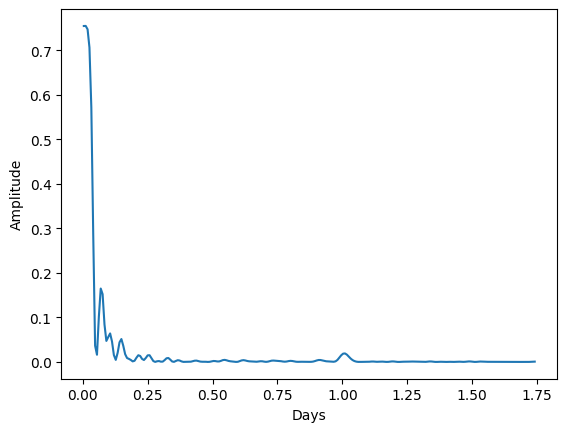

In [ ]:
# Apresentação de resultados
plt.plot(frequency, power)
plt.xlabel("Days")
plt.ylabel("Amplitude")

#### Exemplo 02. Constituintes harmónicas da maré
---
A. Extrair dados a ser analisados

In [ ]:
# Sinal a ser analisada
s_gau = df_gau_range["Reading"]

# Intervalos de Tempo
t_gau = range(1, len(s_gau)+1)

B. Análise por Lomb Scargle (análise espectral por mínimos quadrados)

In [ ]:
# Análise por método de Lomb Scargle
frequency, power = LombScargle(t_gau, s_gau).autopower()

C. Plotar constituintes harmónicas

Text(0, 0.5, 'Amplitude')

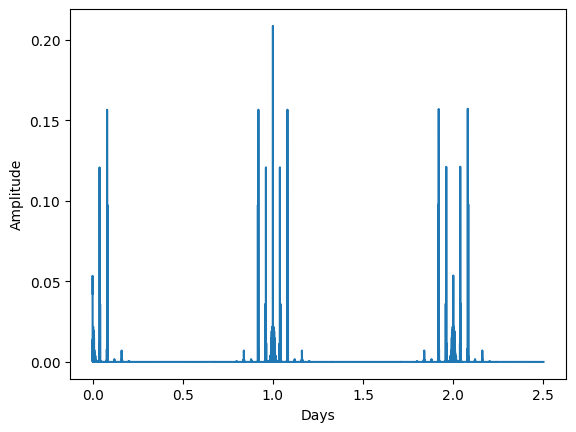

In [ ]:
# Apresentação de resultados
plt.plot(frequency, power)
plt.xlabel("Days")
plt.ylabel("Amplitude")

## **1.4. Processos determinísticos e estocásticos**

Atualmente, existem 2 formas de analisarmos uma a série temporal:

1.   **A visão clássica**
  
  Se baseia no pressuposto que os valores que compõem a variável de interesse podem ser **divididos em componentes simples de tendência, sazonalidade e ruído (componentes estáveis).**

2.   **A visão moderna**

  Se baseia na análise das componentes determinísticas e estocásticas da série, possibilitando isolar o conjunto de dados **fortemente influenciados por processos aleatórios e que podem interferir consideravelmente os resultados da modelagem (componentes puramente aleatórios)**.

  Neste sentido, podemos definir uma série como:

  *   **Série determinística.** Quando ela depende rigorosamente de observações passadas produzidas por alguma função matemática.
  
      Exemplo:
      
      Se gerarmos uma senoide, podemos dizer que uma é uma série determinística, pois os valores são dependentes das observações históricas.
  
  <center><img src=https://blog.raisa.com.br/wp-content/uploads/2023/02/image-101.png width="700"></center>

  <center>Fonte: blog.raisa.com.br (2024)</center>
  
  *   **Série estocástica.** Quando ela é definida como uma sequência de observações e relações aleatórias que seguem funções de probabilidade e podem mudar com o tempo.
  
      Exemplo:
      
      Quando geramos uma distribuição normal com média 0 e desvio padrão 0.5, podemos dizer que é uma série estocástica, haja visto que esses valores foram gerados aleatoriamente e não seguem nenhum padrão.

  <center><img src=https://iili.io/dMyhGXs.md.png width="500"></center>

  <center>Fonte: Morettin, P. & Toloi, C. (2014)</center>


**Importante:**

Na realidade o que chamamos de série temporal é uma parte de uma trajetória (curvas definidas em função de t) dentre muitas que podem ter sido observadas.

### **1.4.1. Teorema de Gauss Markov**

De forma geral, para descrever uma série através de um modelo matemático geral (i.e. previsão por mínimos quadrados), é necessário que dita série cumpra alguns requisitos tanto dos **processos de Gauss**, como dos **processos de Markov** (Processo Ornstein–Uhlenbeck):.

<center><img src=https://iili.io/dVHdi2n.md.png width="500"></center>

#### 1.4.1.1 Estacionariedade de uma série

Uma série temporal é considerada estacionária se suas propriedades estatísticas (como a média, a variância, a autocovariância) não mudam ao longo do tempo. Desta forma, um processo estocástico é dito fraca ou fracamente estacionário se suas propriedades estatísticas básicas são invariantes ao longo do tempo.

Formalmente, um processo estocástico $X_t$ é considerado fracamente estacionário se:

*   A média $\mu_t$ = $E[X_t]$ é constante para todos os tempos $t$.
*   A autocovariância $\gamma_{t,s}$ = $Cov(X_t, X_s)$ depende apenas da diferença temporal $t-s$, ou seja, $\gamma_{t,s}$ = $\gamma_{t+h, s+h}$ para todo $t$, $s$ e $h$.

#### Exemplo. Comprovação da estacionariedade de uma série
---

A. Extrair dados a ser analisados

Text(0, 0.5, 'Up (m)')

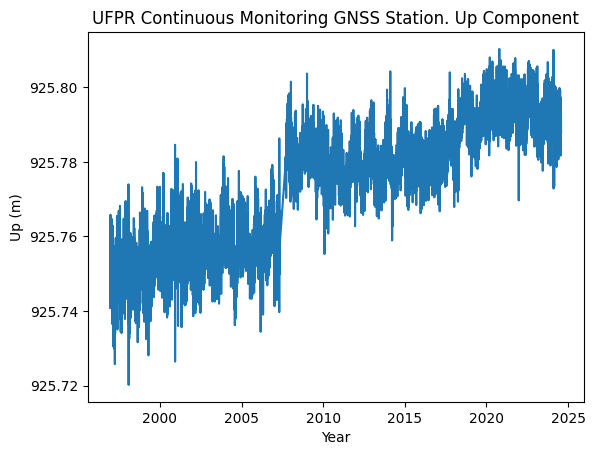

In [ ]:
# Intervalos de Tempo
t = df_gps["Decimal Year"]

# Componente a ser analisada
s = df_gps["Up"]

# Apresentação de resultados
plt.plot(t, s)
plt.title('UFPR Continuous Monitoring GNSS Station. Up Component')
plt.xlabel("Year")
plt.ylabel("Up (m)")

B. Histograma dos dados

Text(0.5, 1.0, "Histogram with 'auto' bins")

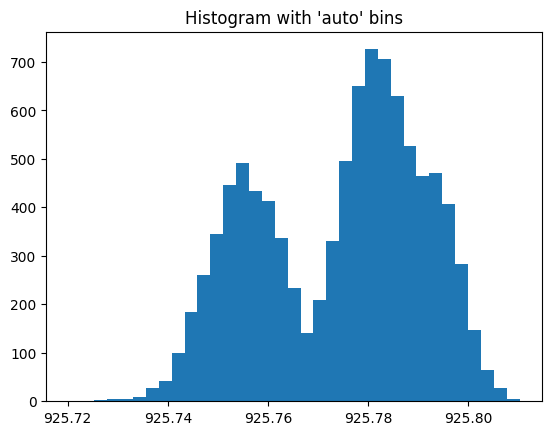

In [ ]:
plt.hist(s, bins='auto')
plt.title("Histogram with 'auto' bins")

C. Cálcular a média e variância dos dados

In [ ]:
# Cálculo da média dos dados
mean_s = np.mean(s)

# Cálculo da variância dos dados
var_s = np.var(s)

print('mean=%f' % (mean_s))
print('var=%f' % (var_s))

mean=925.774302
var=0.000272


D. Amostragem do conjunto de dados

Text(0, 0.5, 'Up (m)')

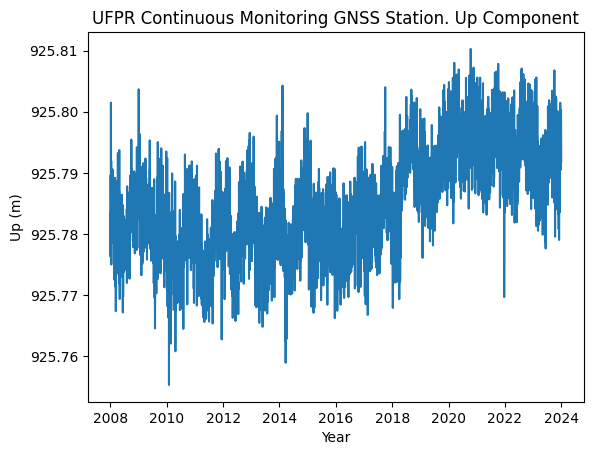

In [ ]:
# Definir coluna "Date" como indexador da Tabela
df_gps_t = df_gps.set_index('Decimal Year')

# Definir o intervalo de tempo para amostragem
df_gps_range = df_gps_t.loc['2008':'2024']

# Intervalos de Tempo
t_range = df_gps_range.index

# Componente a ser analisada
s_range = df_gps_range["Up"]

# Apresentação de resultados
plt.plot(t_range, s_range)
plt.title('UFPR Continuous Monitoring GNSS Station. Up Component')
plt.xlabel("Year")
plt.ylabel("Up (m)")

E. Histograma dos dados amostrados

Text(0.5, 1.0, "Histogram with 'auto' bins")

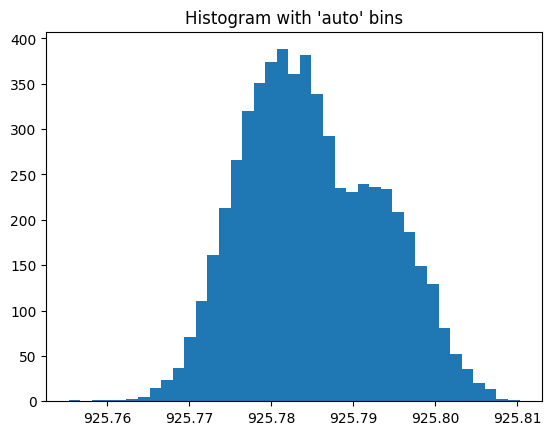

In [ ]:
plt.hist(s_range, bins='auto')
plt.title("Histogram with 'auto' bins")

D. Cálcular a média e variância dos dados amostrados

In [ ]:
# Cálculo da média dos dados
mean_sr = np.mean(s_range)

# Cálculo da variância dos dados
var_sr = np.var(s_range)

print('mean=%f' % (mean_sr))
print('var=%f' % (var_sr))

mean=925.785020
var=0.000071


E. Normalizar dados amostrados

Text(0, 0.5, 'Up (m)')

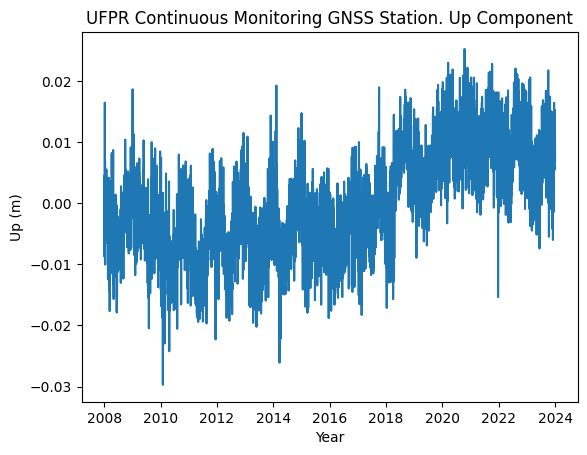

In [ ]:
# Remoção da média do conjunto de dados
s_range_zero = s_range - np.mean(s_range)

# Apresentação de resultados
plt.plot(t_range, s_range_zero)
plt.title('UFPR Continuous Monitoring GNSS Station. Up Component')
plt.xlabel("Year")
plt.ylabel("Up (m)")

F. Cálcular a média e variância dos dados normalizados

In [ ]:
# Cálculo da média dos dados
mean_srz = np.mean(s_range_zero)

# Cálculo da variância dos dados
var_srz = np.var(s_range_zero)

print('mean=%f' % (mean_srz))
print('var=%f' % (var_srz))

mean=0.000000
var=0.000071


G. Dividir conjunto de dados

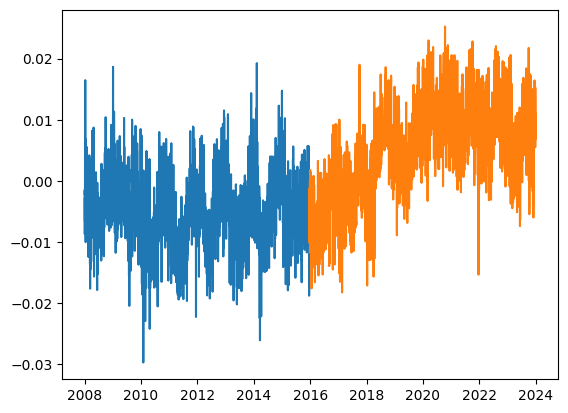

In [ ]:
# Dividir em partes iguais o conjunto de dados
split = round(len(s_range_zero.to_numpy()) / 2)
s_range_zero_1, s_range_zero_2 = s_range_zero.to_numpy()[0:split], s_range_zero.to_numpy()[split:]
t_1, t_2 = t_range.to_numpy()[0:split], t_range.to_numpy()[split:]

# Apresentação de resultados
plt.plot(t_1, s_range_zero_1)
plt.plot(t_2, s_range_zero_2)

H. Cálcular a média e variância dos conjuntos de dados

In [ ]:
# Cálculo da média dos dados
mean_srz1, mean_srz2 = s_range_zero_1.mean(), s_range_zero_2.mean()

# Cálculo da variância dos dados
var_srz1, var_srz2 = s_range_zero_1.var(), s_range_zero_2.var()

print('mean1=%f, mean2=%f' % (mean_srz1, mean_srz2))
print('variance1=%f, variance2=%f' % (var_srz1, var_srz2))

mean1=-0.005020, mean2=0.005020
variance1=0.000031, variance2=0.000059


I. Teste de Hipótese. Comparação de 2 variâncias amostrais

<img src=https://vitalflux.com/wp-content/uploads/2023/01/null-and-alternate-hypothesis-for-Levene-Test.png width="550">

In [ ]:
# Obter estatísticos do teste
if levene(s_range_zero_1, s_range_zero_2)[1] < 0.05:
    print('Reject the null hypothesis of equal variance between groups.')
    print(f'P-value is {levene(s_range_zero_1, s_range_zero_2)[1]}.')
else:
    print('Fail to reject the null hypothesis of equal variance between groups.')
    print(f'P-value is {levene(s_range_zero_1, s_range_zero_2)[1]}.')

Reject the null hypothesis of equal variance between groups.
P-value is 3.6079025742352275e-64.


## **1.5. Séries de Tempo em Geodésia**

A definição fundamental do Sistema de Referência Terrestre Internacional, ITRS (em inglês: International Terrestrial Reference System) se baseia na materialização de um conjunto de pontos sobre a superfície terrestre, cujas coordenadas são definidas convencionalmente para uma época de referência em particular. Isto inclui suas variações lineares no tempo.

#### **1.5.1. Modelo Linear de Trajetórias**

Desta maneira, a parte secular do poliedro mundial é basicamente determinada por um conjunto de coordenadas ${ \overrightarrow { X }  }_{ 0 }^{ \left( i \right)  }$ e velocidades ${ \overrightarrow { V }  }_{ 0 }^{ \left( i \right)  }$, $\forall i\in N:i\le 1$, relacionadas através do estabelecimento de um modelo funcional linear, chamado de ''modelo linear de trajetórias'' (em inglês: standard linear trajectory model, SLTM):

\begin{equation}
{ \overrightarrow { X }  }^{ \left( i \right)  }\left( t \right) ={ \overrightarrow { X }  }_{ 0 }^{ \left( i \right)  }+{ \overrightarrow { V }  }_{ 0 }^{ \left( i \right)  }\left( t-{ t }_{ 0 } \right)
\end{equation}

onde, ${ t }_{ 0 }$ é a época de referência.

O poliedro define de forma implícita os eixos, a origem e a escala do sistema de coordenadas, o mesmo que serve como base para a descrição do estado geométrico da Terra e dos processos físicos ocorrentes na sua superfície e no seu interior.

Dependendo do período de tempo analisado, é possível incluir na equação um termo que represente as flutuações de curto período dos pontos advinda dos diferentes processos geofísicos. Desta maneira o SLTM pode ser representado por:

\begin{equation}
{ \overrightarrow { X }  }\left( t \right) ={ \overrightarrow { X }  }\left( { t }_{ 0 } \right) +{ \overrightarrow { V }  }_{ 0 }^{ \left( i \right)  }\left( t-{ t }_{ 0 } \right) +\sum _{ k=1 }^{ K }{ { \overrightarrow { g }  }_{ k } } \left( t \right)
\end{equation}

onde, o termo ${ \overrightarrow { g }  }_{ k }\left( t \right) $, representa os deslocamentos dos pontos obtidos com base na utilização dos modelos a-priori definidos na IERS Conventions 2010.

<center><img src=https://iili.io/dV2O3sS.md.png width="520"></center>

**Importante:**

No ano 2007, o IERS, através de sua Agência Especial do GGFC (em inglês: GGFC Special Bureau for Loading) concluiu que o SLTM não é uma abordagem adequada para satisfazer o nível de acurácia estabelecido pelo GGOS de $10^{-9}$ ou melhor. Isto, devido a que este não é capaz de modelar de forma consistente as variações na forma da Terra, no campo de gravidade e na rotação terrestre, de forma integrada e correlacionada.

#### **1.5.2. Modelo dinâmico de referência**

<center><img src=https://iili.io/dV2bJcu.md.png width="520"></center>

<center>Figura. Componentes do Sistema Terrestre de acordo com o DREM</center>
<center>Fonte. Herring, T. et. al. (2009)</center>

De acordo com Plag, et. al. (2007), uma alternativa frente ao SLTM é o chamado de ''Modelo dinâmico de referência terrestre'' (em ingles: Dynamic Reference Earth Model, DREM) (Herring, T. et. al. 2009). Neste, a parte secular do poliedro mundial é determinada através da equação:

\begin{equation}
{ \overrightarrow { X }  }\left( t \right) ={ \overrightarrow { X }  }_{ 0 }+{ \delta \overrightarrow { X }  }\left( t \right)  
\end{equation}

onde ${ \delta \overrightarrow { X }  }\left( t \right) $, chamado de ''movimento anômalo'', representa o campo vetorial dos deslocamentos preditos para qualquer ponto da superfície terrestre no tempo $t$.

Desta maneira, com o objetivo de definir um Sistema de Referência Terrestre fisicamente funcional, o DREM deve dar conta da maioria dos sinais geofísicos conhecidos. No entanto, na ausência de um modelo do Sistema Terrestre suficientemente integrado, o DREM pode ser definido através de um conjunto de modelos independentes, com cada um deles representando um subconjunto dos processos físicos relevantes. Isto inclui, os deslocamentos co-sísmicos e pós-sísmicos de grandes terremotos e todos os efeitos de carga (atmosférico, oceânico e hidrológico), bem como, a resposta isostática pós-glacial. Neste caso, o campo vetorial dos deslocamentos seria descrito por:

\begin{equation}
{ \delta \overrightarrow { X }  }\left( \overrightarrow { X } ,t \right) =\sum _{ j=1 }^{ M }{ { \overrightarrow { g }  }_{ j }\left( \overrightarrow { X } ,t \right)  } \quad \Longrightarrow \quad i\in N:1\le i\le M
\end{equation}

onde $M$ é o número de campos vetoriais determinados a partir dos $M$ modelos geofísicos que representam processos tais como: marés terrestres, efeitos de carga, terremotos, entre outros. Em princípio, o DEM, pode ser visto como uma extensão do SLTM, no entanto, ao contrário deste, o termo ${ \overrightarrow { g }  }_{ j }\left( \overrightarrow { X } ,t \right) $ é definido em função de sua posição $\overrightarrow { X } $ e do tempo $t$ (campo vetorial), o qual seria possível de fazer só com a existência de um modelo integrado do sistema Terra.

É importante salientar que a partir da realização de 2014 (Altamimi, Z. et. al.2016), o ITRF, conta com um modelo de deformação pós-sísmica (em inglês: Postseismic Deformation Models, PSD), o qual visa representar o impacto nas suas soluções dos grandes processos telúricos. Não entanto, ele só é considerado uma solução pontual ao problema, visto que ainda não é capaz de representar as interações de ditos processos com os demais componentes do sistema. O PSD é representado por:

\begin{equation}
{ { \overrightarrow { X }  }_{ PSD } }\left( t \right) ={ \overrightarrow { X }  }\left( { t }_{ 0 } \right) +{ \overrightarrow { V }  }_{ 0 }^{ \left( i \right)  }\left( t-{ t }_{ 0 } \right) +{ { \overrightarrow { \delta X }  }_{ PSD } }\left( t \right)
\end{equation}

onde, para cada componente $L\in \left\{ E,N,U \right\} $, a soma total das correções de PSD ${ { \overrightarrow { \delta X }  }_{ PSD } }\left( t \right) $ pode ser expressa no sistema local na época t, através da equação:

\begin{equation}
{ { \overrightarrow { \delta L }  } }\left( t \right) =\sum _{ i=1 }^{ { n }^{ l } }{ { A }_{ i }^{ l }\log { \left( 1+\frac { t-{ t }_{ i }^{ l } }{ { \tau  }_{ i }^{ l } }  \right) + }  } \sum _{ i=1 }^{ { n }^{ e } }{ { A }_{ i }^{ e }\left( 1-{ e }^{ -\frac { t-{ t }_{ i }^{ e } }{ { \tau  }_{ i }^{ e } }  } \right)  }
\end{equation}

sendo, ${ n }^{ l }$ o número de termos logarítmicos, ${ n }^{ e }$ o número de termos exponenciais, ${ A }_{ i }^{ l }$ a amplitude do i-ésimo termo logarítmico, ${ A }_{ i }^{ e }$ a amplitude do i-ésimo termo exponencial, ${ \tau  }_{ i }^{ l }$ o tempo de relaxação do i-ésimo termo logarítmico, ${ \tau  }_{ i }^{ e }$ o tempo de relaxação do i-ésimo termo exponencial, ${ t }_{ i }^{ l }$ a data do evento telúrico correspondente ao i-ésimo termo logarítmico e ${ t }_{ i }^{ e }$ a data do evento telúrico correspondente ao i-ésimo termo exponencial.

#### Exemplo. Cálculo dos principais componentes. Análise de uma série sintética
---

A. Criar a série

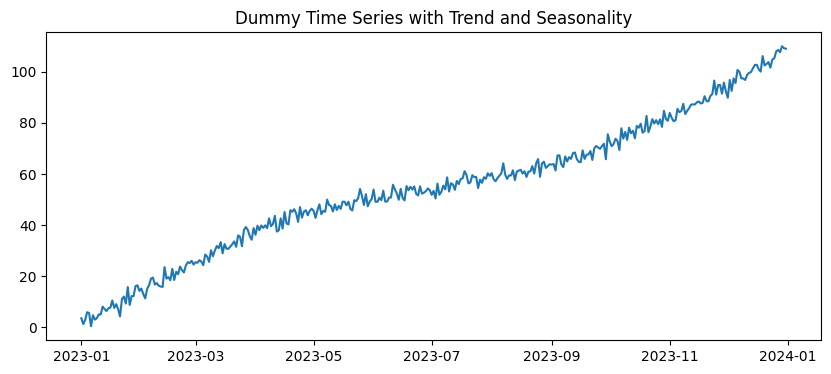

In [ ]:
# Generate a dummy time series with trend, seasonality, and residual
np.random.seed(0)
date_rng = pd.date_range(start='2023/01/01', end='2023/12/31', freq='D')
t = np.arange(len(date_rng))
trend = 0.3 * t
seasonality = 10 * np.sin(2*np.pi*t/365)
residuals = np.random.normal(0, 2, len(date_rng))
ts = pd.Series(trend + seasonality + residuals, index=date_rng)
# Visualize the dummy time series
plt.figure(figsize=(10, 4))
plt.plot(ts)
plt.title('Synthetic Time Series with Trend and Seasonality')
plt.show()

B. Decomposição usando SMA (Média Móvel Simples)

In [ ]:
# Define the window size for SMA
window_size = 30
trend_sma = ts.rolling(window=window_size).mean()
residual_sma = ts - trend_sma
seasonality = 10 * np.sin(2*np.pi*t/365)

C. Apresentação de resultados

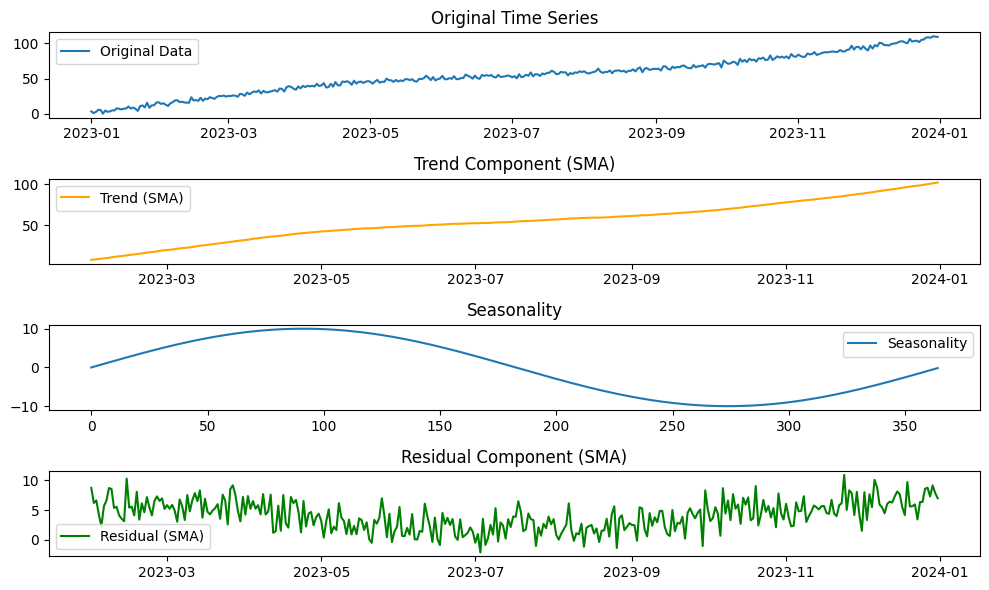

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(ts, label='Original Data')
plt.title('Original Time Series')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(trend_sma, label='Trend (SMA)', color='orange')
plt.title('Trend Component (SMA)')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(seasonality, label='Seasonality')
plt.title('Seasonality')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(residual_sma, label='Residual (SMA)', color='green')
plt.title('Residual Component (SMA)')
plt.legend()
plt.tight_layout()
plt.show()